# BoomBikesProject 
   <font color='Orange'> <b> (Model the demand for shared bikes) </b> </font>
   



<ol>
    <li>Data Dictionary/Characteristics</li>
    <li>Loading Data  (✓)</li>
    <li>Data Preperation</li>
        <ol>
            <li>Converting Binary states to 0 and 1 (yes/no, day/night, good/bad etc)</li>
            <li>Creating dummy variables for string data ()</li>
    </ol>
    <li>Data Visualization</li>
     <ol>
         <li>pair plots</li>
         <li>box plots</li>
         <li>correlation heatmap</li>
    </ol>                
    <li>Splitting and Scalling data </li>
        <ol>
            <li>Splitting into Training and Testing sets</li>
            <li>Scaling data</li>
    </ol>
    <li>Building Models</li>
    <li>Residual Analysis of the train data</li>
    <li>Making Predictions using test data</li>
    <li>Model Evaluation</li>
        <ol>
        <li>r^2_score</li>
        <li>scatter plat</li>
    </ol>


### Dataset characteristics

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

### Importing libraries 

In [304]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Importing and Understanding data 

In [305]:
# read the data
bbdf = pd.read_csv('day.csv')

In [306]:
# shid - shape, head, info, describe

In [307]:
bbdf.shape

(730, 16)

In [308]:
bbdf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [309]:
bbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [310]:
bbdf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [311]:
# Get the unique values of 'B' column
bbdf.casual.unique()

array([ 331,  131,  120,  108,   82,   88,  148,   68,   54,   41,   43,
         25,   38,  222,  251,  117,    9,   78,   83,   75,   93,  150,
         86,  186,   34,   15,  123,  140,   42,   47,   72,   61,  100,
        354,   64,   53,  149,  288,  397,  208,  218,  259,  579,  532,
        639,  195,   74,  139,  424,  694,   81,  137,  231,  214,  640,
        114,  244,  316,  191,   46,  247,  724,  982,  359,  289,  321,
        884, 1424, 1047,  401,  460,  203,  166,  300,  981,  472,  317,
        168,  179,  307,  898, 1651,  734,  167,  413,  571,  172,  879,
       1188,  855,  257,  209,  529,  642,  121, 1558,  669,  409,  613,
        745,  177, 1462, 1710,  773,  678,  547,  569,  878, 1965, 1138,
        847,  603,  255,  614,  894, 1612, 1401,  664,  550,  695,  692,
        902, 1582,  536,  735,  909, 2258, 1576,  836,  659,  740,  758,
        871, 2001, 2355, 1549,  673,  513,  736, 1869, 1685,  763,  676,
        563,  815, 1729, 1467,  863,  727,  769,  5

In [312]:
catcol=['cnt','dteday','season','yr', 'mnth','holiday','weekday','workingday','weathersit']
print(len(catcol))
bbdf[catcol]

9


,cnt,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit
0,985,01-01-2018,1,0,1,0,6,0,2
1,801,02-01-2018,1,0,1,0,0,0,2
2,1349,03-01-2018,1,0,1,0,1,1,1
3,1562,04-01-2018,1,0,1,0,2,1,1
4,1600,05-01-2018,1,0,1,0,3,1,1
...,...,...,...,...,...,...,...,...,...
725,2114,27-12-2019,1,1,12,0,4,1,2
726,3095,28-12-2019,1,1,12,0,5,1,2
727,1341,29-12-2019,1,1,12,0,6,0,2
728,1796,30-12-2019,1,1,12,0,0,0,1


In [313]:
contcol=['cnt','casual','registered', 'temp','atemp','hum','windspeed']
print(len(contcol))
bbdf[contcol]

7


,cnt,casual,registered,temp,atemp,hum,windspeed
0,985,331,654,14.110847,18.18125,80.5833,10.749882
1,801,131,670,14.902598,17.68695,69.6087,16.652113
2,1349,120,1229,8.050924,9.47025,43.7273,16.636703
3,1562,108,1454,8.200000,10.60610,59.0435,10.739832
4,1600,82,1518,9.305237,11.46350,43.6957,12.522300
...,...,...,...,...,...,...,...
725,2114,247,1867,10.420847,11.33210,65.2917,23.458911
726,3095,644,2451,10.386653,12.75230,59.0000,10.416557
727,1341,159,1182,10.386653,12.12000,75.2917,8.333661
728,1796,364,1432,10.489153,11.58500,48.3333,23.500518


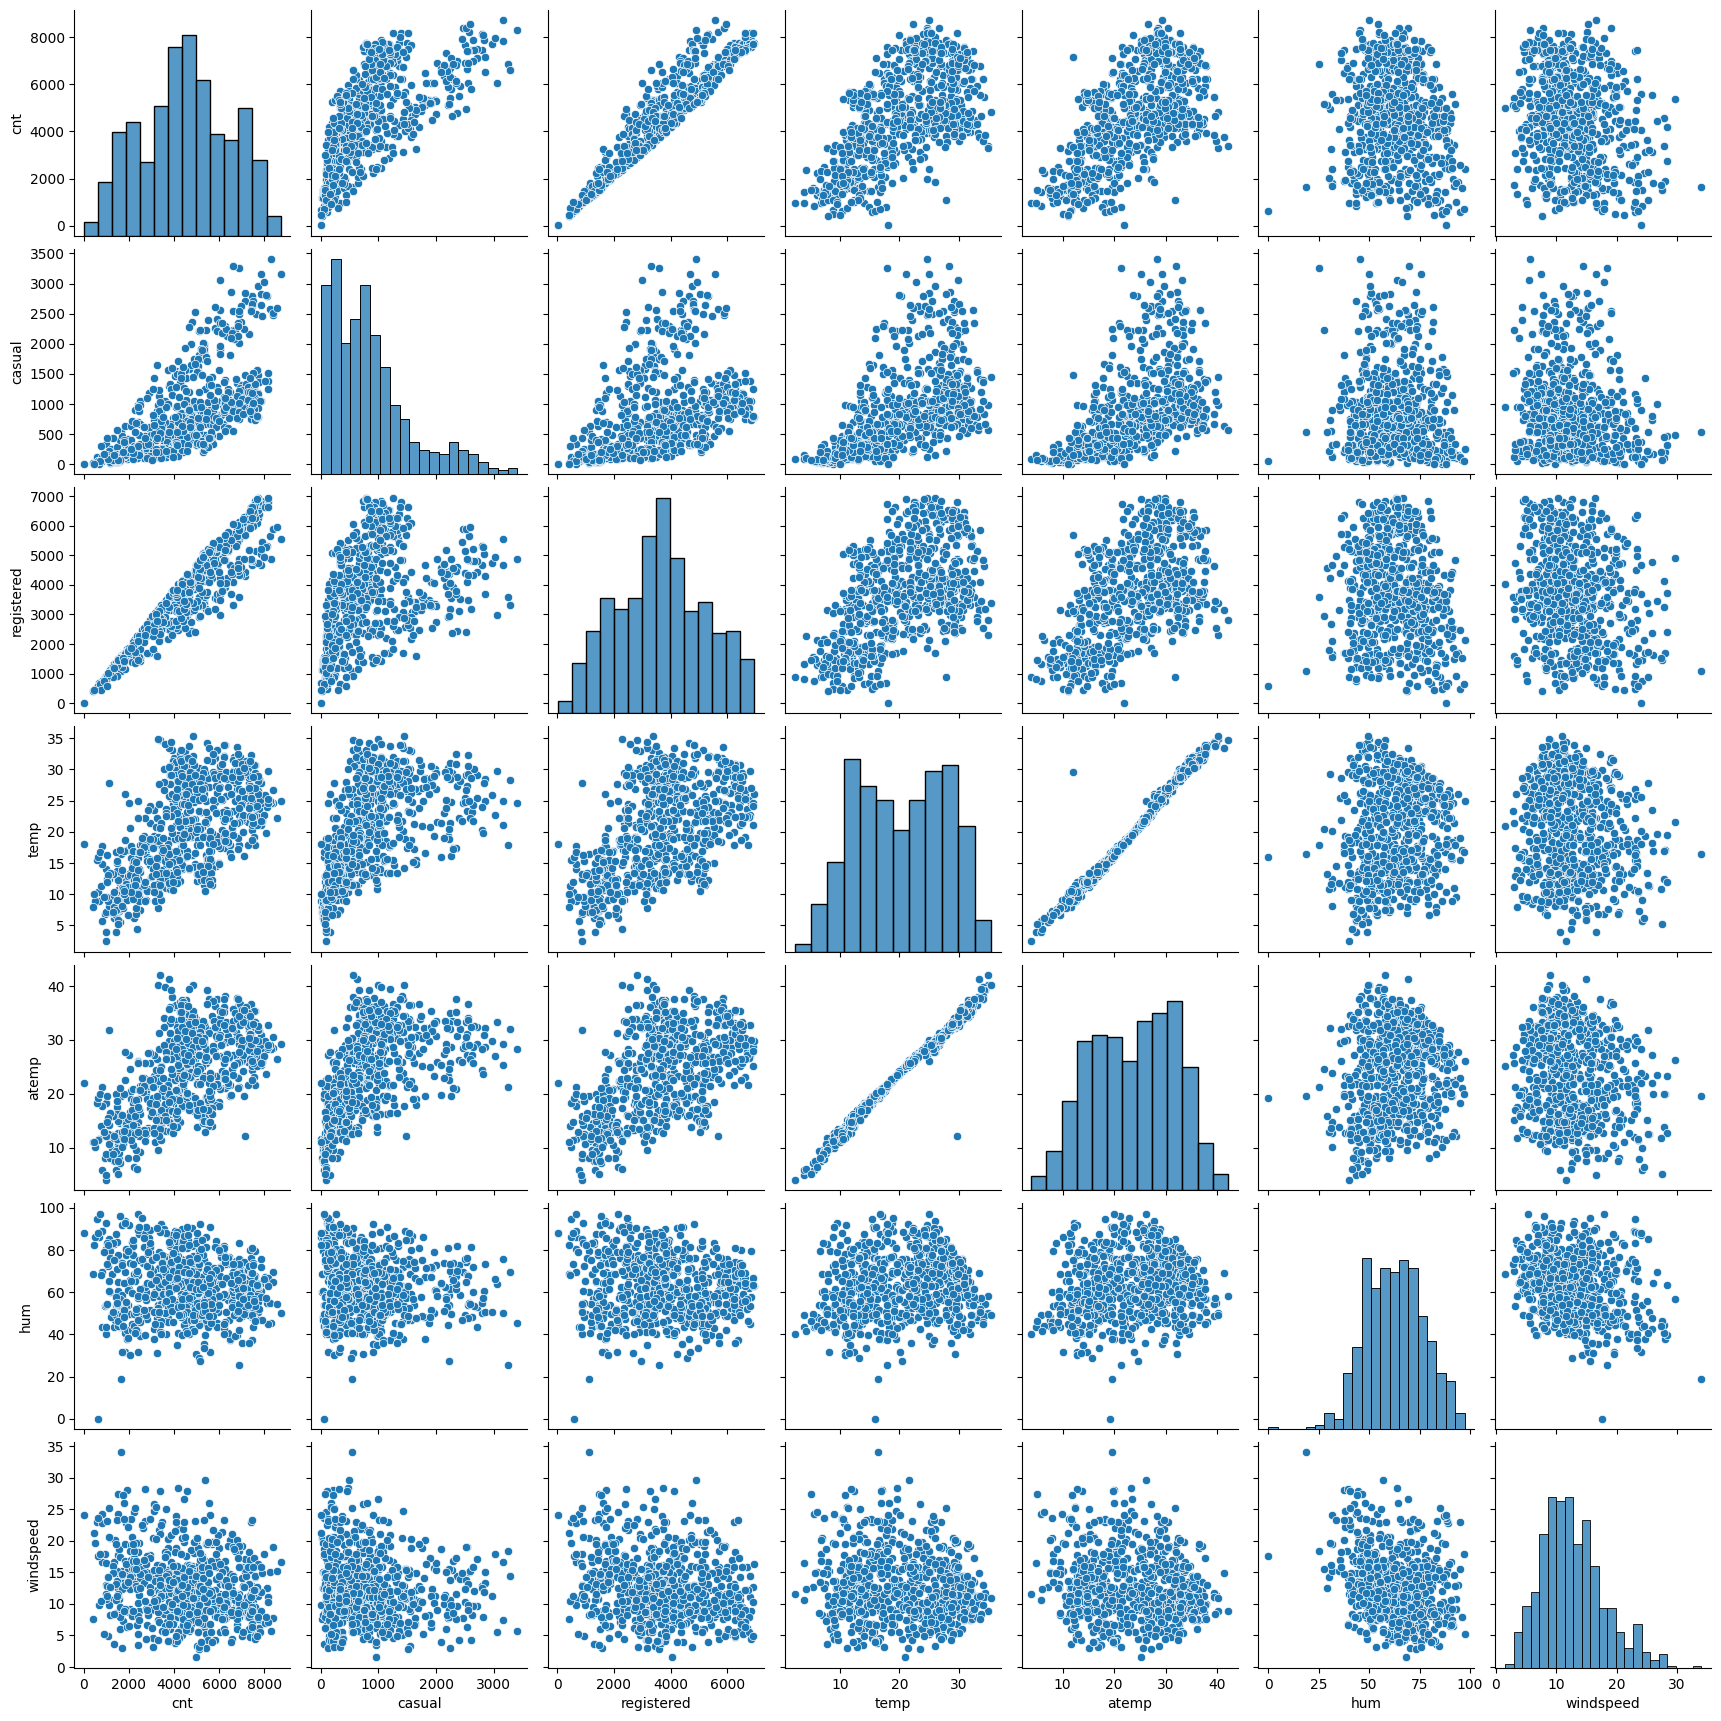

In [314]:
# visualization of numeric variables (continuous variable)
sns.pairplot(bbdf[contcol])
plt.show()

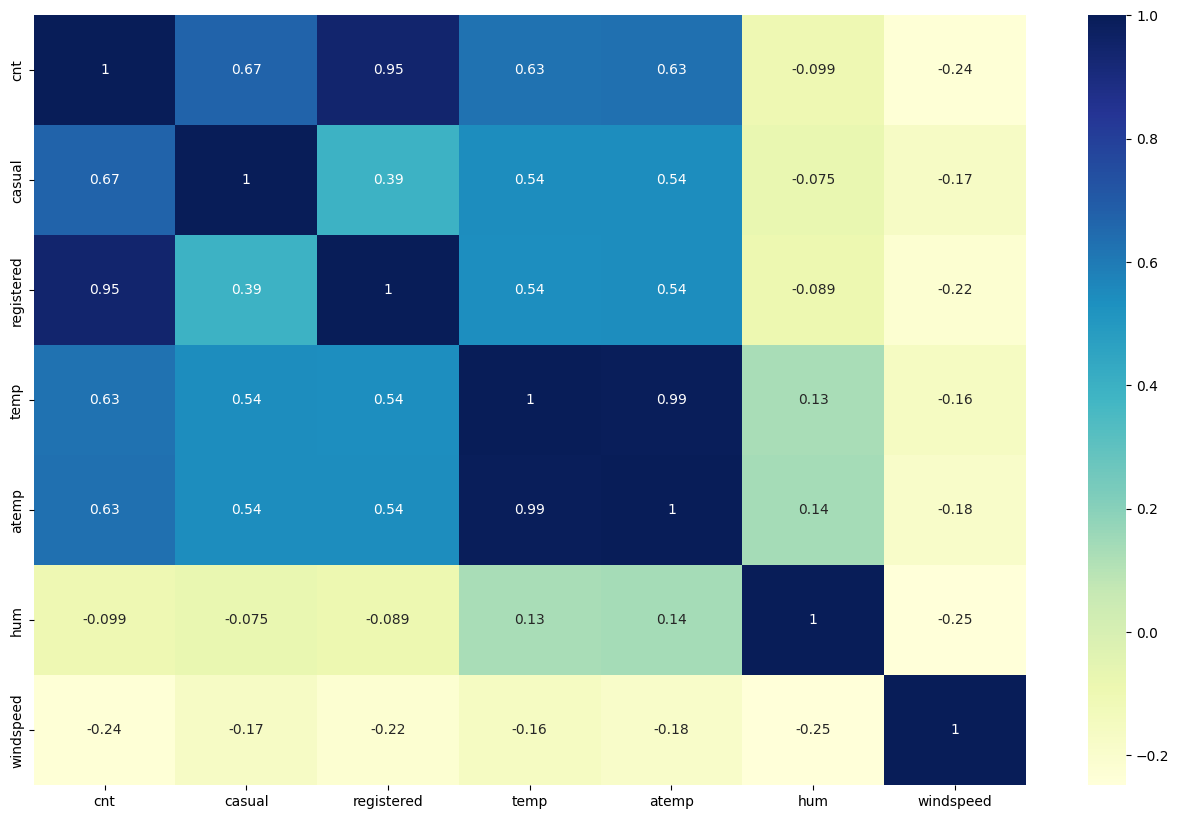

In [315]:
# plot a headmap to see the correlation between the predictors
plt.figure(figsize = (16,10))
sns.heatmap(bbdf[contcol].corr(), annot = True, cmap = "YlGnBu")
plt.show()

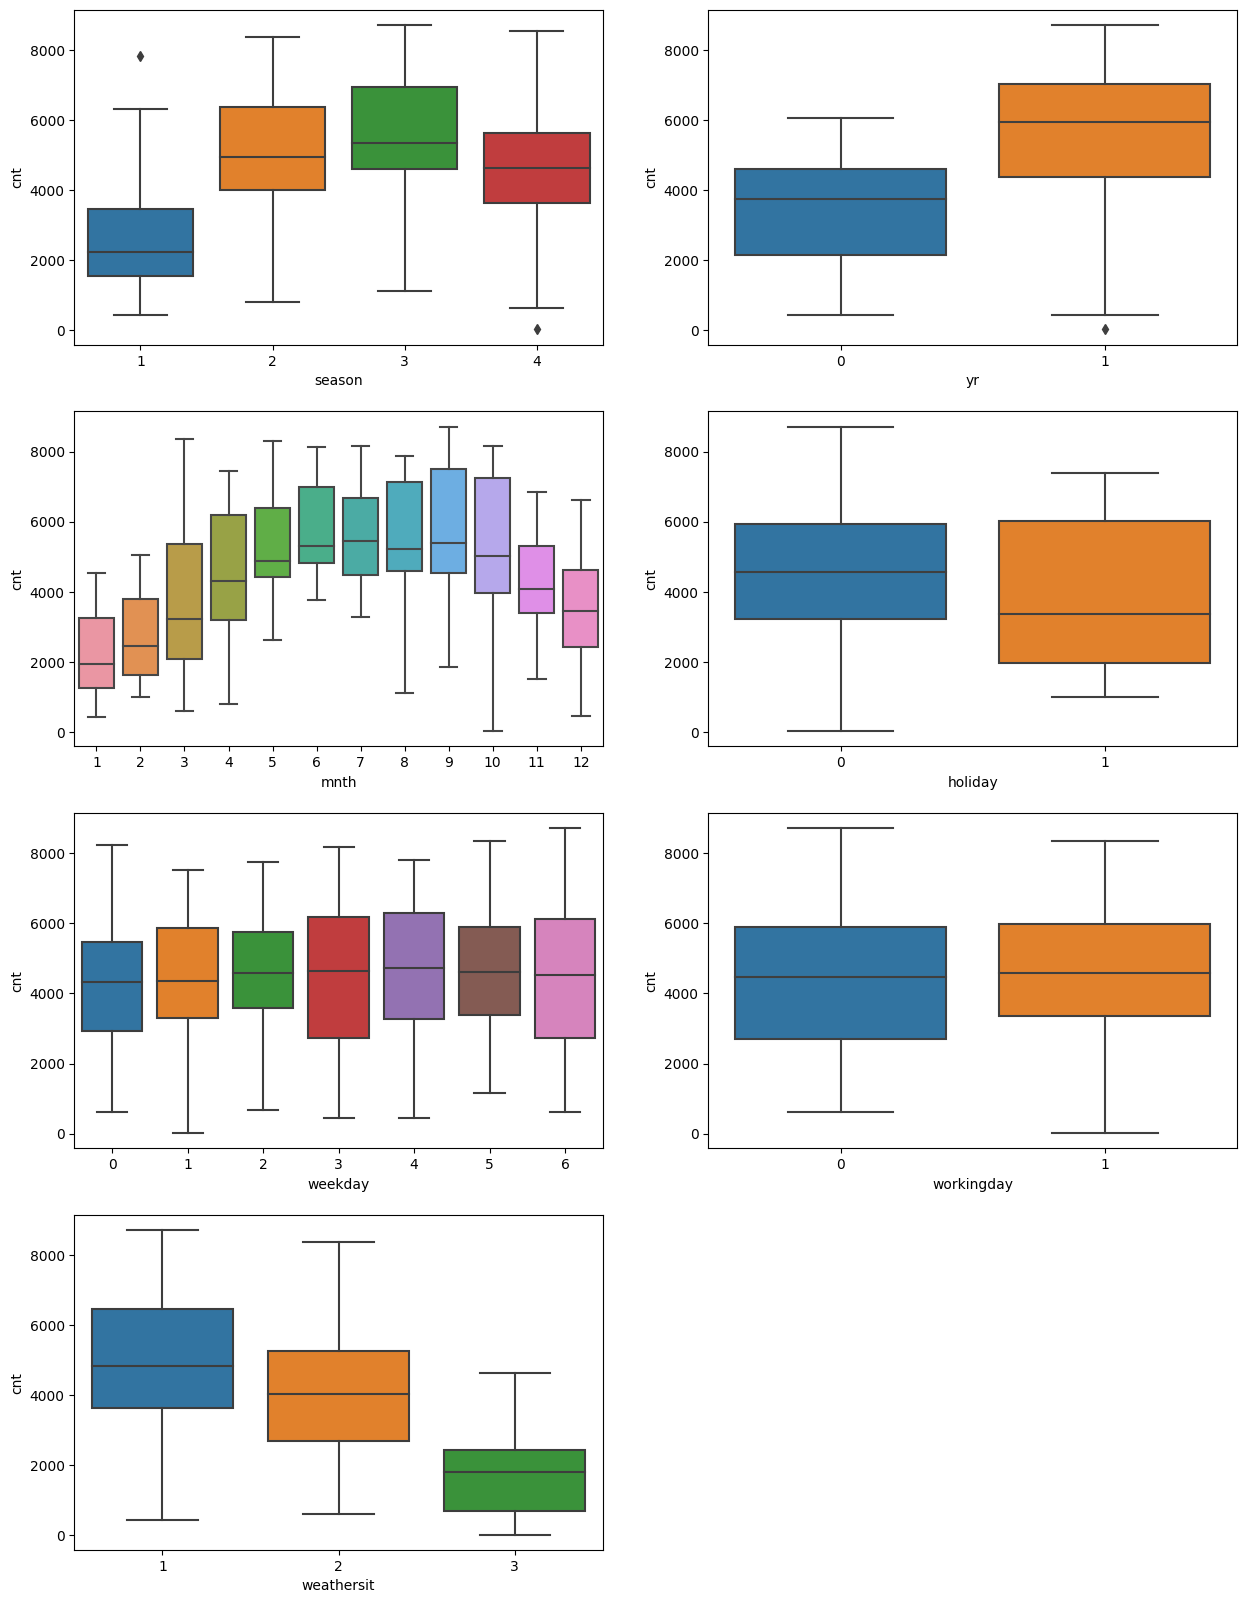

In [316]:
# visualization of categorical variables
# catcol=['cnt','dteday','season','yr', 'mnth','holiday','weekday','workingday','weathersit']

plt.figure(figsize=(15,20 ))
#plt.figure()
#plt.subplot(,4,1)
#sns.boxplot(x = 'dteday', y = 'cnt', data = bbdf)
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bbdf)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bbdf)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bbdf)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bbdf)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bbdf)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bbdf)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bbdf)
plt.show()

### As data does not have any strings following steps are skipped
* Converting binary vars to 1/0
* Other categorical vars to dummy vars


# Splitting data into train and test datasets

In [317]:
# bbdf_1=bbdf.drop(['instant', 'dteday'], axis=1)
bbdf_1=bbdf.drop(['instant', 'dteday'], axis=1)
df_train, df_test = train_test_split(bbdf_1, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 14)
(220, 14)


In [318]:
df_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
576,3,1,7,0,2,1,1,29.246653,33.14480,70.4167,11.083475,968,6248,7216
426,1,1,3,0,6,0,2,16.980847,20.67460,62.1250,10.792293,956,3110,4066
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
482,2,1,4,0,6,0,2,15.443347,18.87520,48.9583,8.708325,1120,3100,4220
111,2,0,4,0,5,1,2,13.803347,16.09770,72.9583,14.707907,177,1506,1683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,3,1,8,0,4,1,1,30.852500,35.35440,65.9583,8.666718,983,6278,7261
53,1,0,2,0,3,1,1,9.091299,12.28585,42.3043,6.305571,139,1778,1917
350,4,0,12,0,6,0,2,10.591653,12.46855,56.0833,16.292189,275,2464,2739
79,2,0,3,0,1,1,2,17.647835,20.48675,73.7391,19.348461,401,1676,2077


## Rescaling the features
using Min-Max scaling (normalization)

In [319]:
scaler = MinMaxScaler()

# creating a list of numeric var
num_vars = ['season', 'mnth', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt']

# Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
576,0.666667,1,0.545455,0,0.333333,1,0.0,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658
426,0.000000,1,0.181818,0,1.000000,0,0.5,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255
728,0.000000,1,1.000000,0,0.000000,0,0.0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096
482,0.333333,1,0.272727,0,1.000000,0,0.5,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973
111,0.333333,0,0.272727,0,0.833333,1,0.5,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095


In [320]:
# df_train.columns
# df_train['workingday'].unique()

In [321]:
df_train.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.504575,0.507843,0.503743,0.025490,0.498366,0.676471,0.201961,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499
std,0.370078,0.500429,0.315038,0.157763,0.336182,0.468282,0.273944,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.181818,0.000000,0.166667,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420
50%,0.666667,1.000000,0.545455,0.000000,0.500000,1.000000,0.000000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638
75%,0.666667,1.000000,0.818182,0.000000,0.833333,1.000000,0.500000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Training the Model

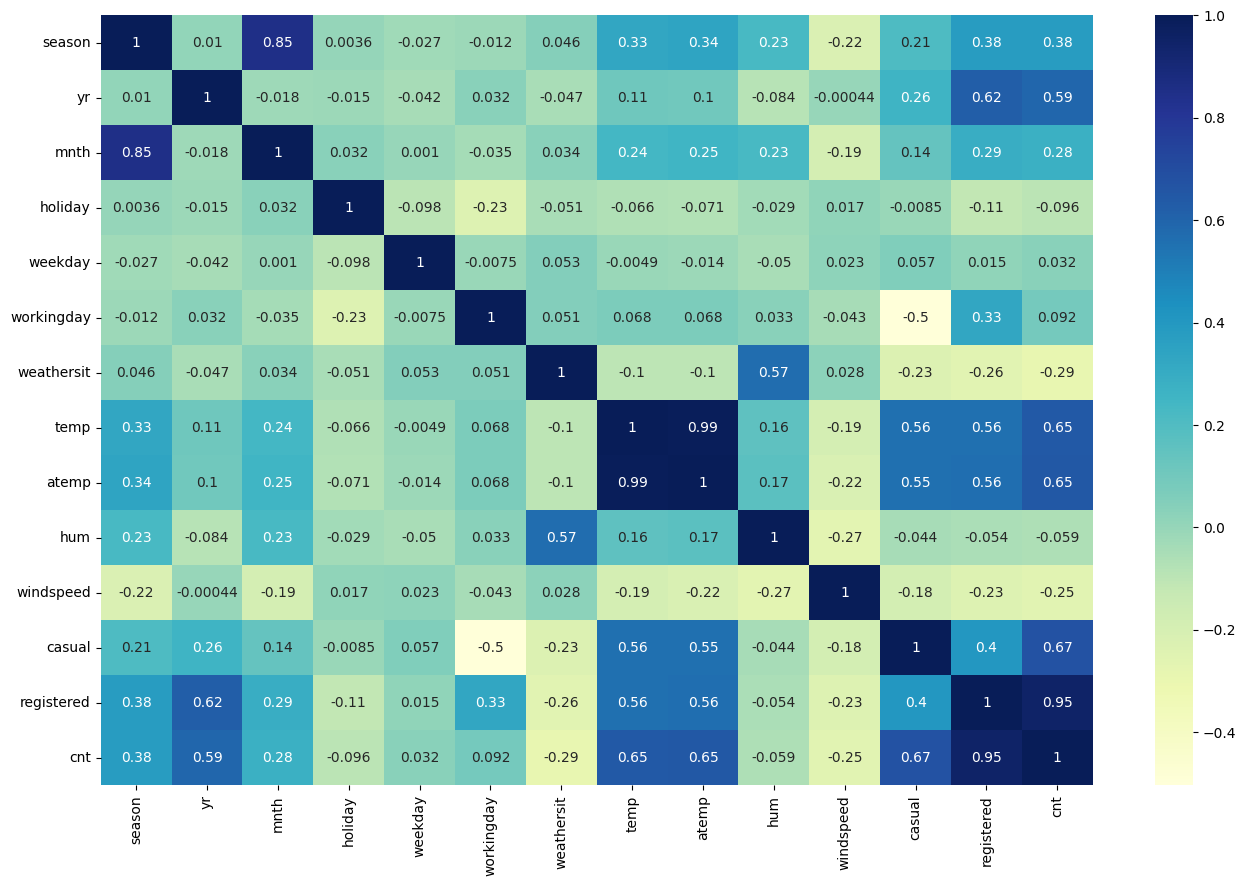

In [322]:
# plot a headmap to see the correlation between the predictors
plt.figure(figsize = (16,10))
sns.heatmap(df_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [323]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [324]:
print(y_train.head())
print(X_train.head())

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64
       season  yr      mnth  holiday   weekday  workingday  weathersit  \
576  0.666667   1  0.545455        0  0.333333           1         0.0   
426  0.000000   1  0.181818        0  1.000000           0         0.5   
728  0.000000   1  1.000000        0  0.000000           0         0.0   
482  0.333333   1  0.272727        0  1.000000           0         0.5   
111  0.333333   0  0.272727        0  0.833333           1         0.5   

         temp     atemp       hum  windspeed    casual  registered  
576  0.815169  0.766351  0.725633   0.264686  0.294422    0.899220  
426  0.442393  0.438975  0.640189   0.255342  0.290765    0.446145  
728  0.245101  0.200348  0.498067   0.663106  0.110332    0.203869  
482  0.395666  0.391735  0.504508   0.188475  0.340750    0.444701  
111  0.345824  0.318819  0.751824   0.380981  0.053337    0.214554  


In [325]:
# add a constant
# using just one predictor to build the model = 'season'
X_train_sm = sm.add_constant(X_train['season'])

#create the first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const     0.397164
season    0.230562
dtype: float64

In [326]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     85.84
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           5.50e-19
Time:                        09:53:18   Log-Likelihood:                 78.714
No. Observations:                 510   AIC:                            -153.4
Df Residuals:                     508   BIC:                            -145.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3972      0.016     25.515      0.000       0.367       0.428
season         0.2306      0.025      9.265      0.000       0.182       0.279
==============================================================================
Omnibus:                       21.488   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.731
Skew:                           0.055   Prob(JB):                      0.00771
Kurtosis:                       2.332   Cond. No.                         3.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [327]:
# add another variable temp
X_train_sm = X_train[['season', 'temp']]
X_train_sm = sm.add_constant(X_train_sm)

# create the model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     205.5
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           4.31e-66
Time:                        09:53:18   Log-Likelihood:                 190.30
No. Observations:                 510   AIC:                            -374.6
Df Residuals:                     507   BIC:                            -361.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1445      0.020      7.353      0.000       0.106       0.183
season         0.1142      0.021      5.390      0.000       0.073       0.156
temp           0.5794      0.035     16.683      0.000       0.511       0.648
==============================================================================
Omnibus:                        1.785   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.610
Skew:                          -0.008   Prob(JB):                        0.447
Kurtosis:                       2.725   Cond. No.                         6.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [328]:
# add another variable windspeed
X_train_sm = X_train[['season', 'temp','windspeed']]
X_train_sm = sm.add_constant(X_train_sm)

# create the model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     143.1
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           3.83e-67
Time:                        09:53:18   Log-Likelihood:                 195.56
No. Observations:                 510   AIC:                            -383.1
Df Residuals:                     506   BIC:                            -366.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2045      0.027      7.619      0.000       0.152       0.257
season         0.1026      0.021      4.817      0.000       0.061       0.144
temp           0.5652      0.035     16.299      0.000       0.497       0.633
windspeed     -0.1449      0.045     -3.248      0.001      -0.233      -0.057
==============================================================================
Omnibus:                        5.078   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                3.719
Skew:                           0.064   Prob(JB):                        0.156
Kurtosis:                       2.602   Cond. No.                         8.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Adding all Variables to the Model

In [329]:
# add another variable windspeed
# bbdf_1=bbdf.drop(['instant', 'dteday'], axis=1)
X_train_sm = X_train.drop(['casual','registered'], axis=1)
X_train_sm = sm.add_constant(X_train_sm)

# create the model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     185.7
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          2.86e-168
Time:                        09:53:18   Log-Likelihood:                 454.40
No. Observations:                 510   AIC:                            -884.8
Df Residuals:                     498   BIC:                            -834.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1818      0.032      5.672      0.000       0.119       0.245
season         0.1409      0.024      5.901      0.000       0.094       0.188
yr             0.2349      0.009     26.035      0.000       0.217       0.253
mnth          -0.0156      0.027     -0.570      0.569      -0.069       0.038
holiday       -0.0686      0.029     -2.341      0.020      -0.126      -0.011
weekday        0.0473      0.013      3.516      0.000       0.021       0.074
workingday     0.0194      0.010      1.974      0.049    9.27e-05       0.039
weathersit    -0.1581      0.021     -7.530      0.000      -0.199      -0.117
temp           0.2136      0.140      1.531      0.127      -0.061       0.488
atemp          0.2828      0.150      1.889      0.059      -0.011       0.577
hum           -0.0972      0.042     -2.341      0.020      -0.179      -0.016
windspeed     -0.1575      0.029     -5.477      0.000      -0.214      -0.101
==============================================================================
Omnibus:                       62.779   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.597
Skew:                          -0.662   Prob(JB):                     6.58e-32
Kurtosis:                       5.237   Cond. No.                         88.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [330]:
# add another variable windspeed
# bbdf_1=bbdf.drop(['instant', 'dteday'], axis=1)
X_train_sm = X_train.drop(['casual','registered','mnth'], axis=1)
X_train_sm = sm.add_constant(X_train_sm)

# create the model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     204.5
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          2.29e-169
Time:                        09:53:18   Log-Likelihood:                 454.24
No. Observations:                 510   AIC:                            -886.5
Df Residuals:                     499   BIC:                            -839.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1806      0.032      5.651      0.000       0.118       0.243
season         0.1295      0.013      9.880      0.000       0.104       0.155
yr             0.2350      0.009     26.082      0.000       0.217       0.253
holiday       -0.0694      0.029     -2.371      0.018      -0.127      -0.012
weekday        0.0469      0.013      3.490      0.001       0.020       0.073
workingday     0.0196      0.010      1.991      0.047       0.000       0.039
weathersit    -0.1571      0.021     -7.514      0.000      -0.198      -0.116
temp           0.2144      0.139      1.538      0.125      -0.060       0.488
atemp          0.2832      0.150      1.892      0.059      -0.011       0.577
hum           -0.0997      0.041     -2.417      0.016      -0.181      -0.019
windspeed     -0.1577      0.029     -5.489      0.000      -0.214      -0.101
==============================================================================
Omnibus:                       62.112   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.702
Skew:                          -0.656   Prob(JB):                     1.70e-31
Kurtosis:                       5.224   Cond. No.                         85.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [331]:
# add another variable windspeed
# bbdf_1=bbdf.drop(['instant', 'dteday'], axis=1)
X_train_sm = X_train.drop(['temp','casual','registered','mnth'], axis=1)
X_train_sm = sm.add_constant(X_train_sm)

# create the model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     226.3
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          4.80e-170
Time:                        09:53:18   Log-Likelihood:                 453.03
No. Observations:                 510   AIC:                            -886.1
Df Residuals:                     500   BIC:                            -843.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1778      0.032      5.565      0.000       0.115       0.241
season         0.1295      0.013      9.869      0.000       0.104       0.155
yr             0.2353      0.009     26.088      0.000       0.218       0.253
holiday       -0.0678      0.029     -2.315      0.021      -0.125      -0.010
weekday        0.0481      0.013      3.585      0.000       0.022       0.075
workingday     0.0198      0.010      2.014      0.045       0.000       0.039
weathersit    -0.1561      0.021     -7.461      0.000      -0.197      -0.115
atemp          0.5104      0.023     21.845      0.000       0.465       0.556
hum           -0.1028      0.041     -2.492      0.013      -0.184      -0.022
windspeed     -0.1507      0.028     -5.306      0.000      -0.207      -0.095
==============================================================================
Omnibus:                       63.967   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.102
Skew:                          -0.658   Prob(JB):                     5.68e-34
Kurtosis:                       5.339   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [332]:
# add another variable windspeed
# bbdf_1=bbdf.drop(['instant', 'dteday'], axis=1)
X_train_sm = X_train.drop(['hum','workingday','temp','casual','registered','mnth'], axis=1)
X_train_sm = sm.add_constant(X_train_sm)

# create the model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     284.7
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          2.91e-170
Time:                        09:53:18   Log-Likelihood:                 447.76
No. Observations:                 510   AIC:                            -879.5
Df Residuals:                     502   BIC:                            -845.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1292      0.019      6.837      0.000       0.092       0.166
season         0.1244      0.013      9.479      0.000       0.099       0.150
yr             0.2381      0.009     26.315      0.000       0.220       0.256
holiday       -0.0819      0.029     -2.848      0.005      -0.138      -0.025
weekday        0.0506      0.013      3.755      0.000       0.024       0.077
weathersit    -0.1865      0.017    -11.226      0.000      -0.219      -0.154
atemp          0.5023      0.023     21.738      0.000       0.457       0.548
windspeed     -0.1326      0.027     -4.831      0.000      -0.187      -0.079
==============================================================================
Omnibus:                       67.756   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.167
Skew:                          -0.724   Prob(JB):                     4.06e-33
Kurtosis:                       5.219   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [333]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_train_1 = X_train.drop(['hum','workingday','temp','casual','registered','mnth'], axis=1)
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,atemp,5.36
0,season,3.18
6,windspeed,3.15
3,weekday,2.83
1,yr,1.98
4,weathersit,1.52
2,holiday,1.03


# Residual Analysis

In [334]:
X_train_sm

,const,season,yr,holiday,weekday,weathersit,atemp,windspeed
576,1.0,0.666667,1,0,0.333333,0.0,0.766351,0.264686
426,1.0,0.000000,1,0,1.000000,0.5,0.438975,0.255342
728,1.0,0.000000,1,0,0.000000,0.0,0.200348,0.663106
482,1.0,0.333333,1,0,1.000000,0.5,0.391735,0.188475
111,1.0,0.333333,0,0,0.833333,0.5,0.318819,0.380981
...,...,...,...,...,...,...,...,...
578,1.0,0.666667,1,0,0.666667,0.0,0.824359,0.187140
53,1.0,0.000000,0,0,0.500000,0.0,0.218747,0.111379
350,1.0,1.000000,0,0,1.000000,0.5,0.223544,0.431816
79,1.0,0.333333,0,0,0.166667,0.5,0.434043,0.529881


In [335]:
y_train_pred = lr_model.predict(X_train_sm)

<AxesSubplot:ylabel='Density'>

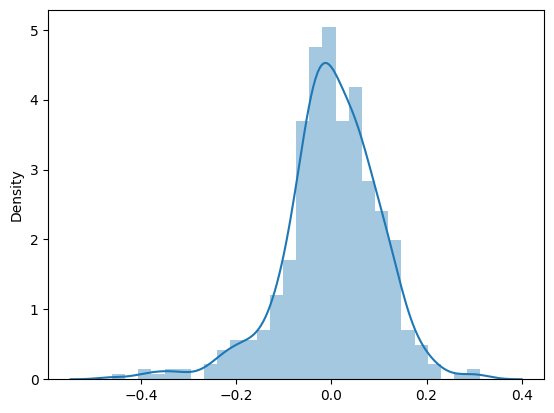

In [336]:
res = y_train - y_train_pred
sns.distplot(res)

In [337]:
# create a list of numeric vars
# creating a list of numeric var
num_vars = ['season', 'mnth', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt']

# Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
184,0.666667,0,0.545455,1,0.166667,0,0.5,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706
535,0.333333,1,0.454545,0,0.500000,1,0.0,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034
299,1.000000,0,0.818182,0,0.666667,1,0.5,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382
221,0.666667,0,0.636364,0,0.500000,1,0.0,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400
152,0.333333,0,0.454545,0,0.666667,1,0.0,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029


In [338]:
df_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.487879,0.481818,0.499174,0.036364,0.502273,0.700000,0.186364,0.558718,0.532847,0.638221,0.313293,0.266436,0.529076,0.522154
std,0.370602,0.500809,0.311120,0.187620,0.330843,0.459303,0.269102,0.233187,0.217401,0.148694,0.159584,0.216751,0.219300,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205
25%,0.000000,0.000000,0.272727,0.000000,0.166667,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.102484,0.359190,0.378595
50%,0.333333,0.000000,0.454545,0.000000,0.500000,1.000000,0.000000,0.558172,0.544652,0.625590,0.300126,0.225236,0.527577,0.524678
75%,0.666667,1.000000,0.727273,0.000000,0.833333,1.000000,0.500000,0.755981,0.713308,0.743798,0.402718,0.361780,0.667088,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300


In [339]:
y_test = df_test.pop('cnt')
X_test = df_test

In [340]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
184,1.0,0.666667,0,0.545455,1,0.166667,0,0.5,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086
535,1.0,0.333333,1,0.454545,0,0.500000,1,0.0,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976
299,1.0,1.000000,0,0.818182,0,0.666667,1,0.5,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376
221,1.0,0.666667,0,0.636364,0,0.500000,1,0.0,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630
152,1.0,0.333333,0,0.454545,0,0.666667,1,0.0,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143


In [341]:
X_test_sm = X_test_sm.drop(['hum','workingday','temp','casual','registered','mnth'], axis=1)

In [342]:
X_test_sm.shape

(220, 8)

In [343]:
X_test_sm.columns

Index(['const', 'season', 'yr', 'holiday', 'weekday', 'weathersit', 'atemp',
       'windspeed'],
      dtype='object')

In [344]:
# predict
y_test_pred = lr_model.predict(X_test_sm)

In [345]:
# evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7815289564483857

Text(0, 0.5, 'y_pred')

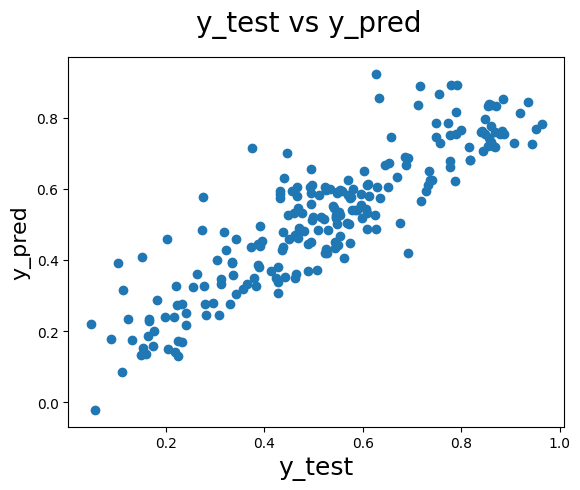

In [346]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## Building the model with <font color=red>RFE</font>

This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE-Recursive feature elimination (which is a utility from sklearn)

In [509]:
# read the data
bbdf_rfe = pd.read_csv('day.csv')

In [510]:
# train test split
bbdf_rfe_1=bbdf_rfe.drop(['instant', 'dteday','casual','registered', 'temp', 'hum', 'mnth'], axis=1)
df_train_rfe, df_test_rfe = train_test_split(bbdf_rfe_1, train_size=0.7, random_state=100)
print(df_train_rfe.shape)
print(df_test_rfe.shape)

(510, 9)
(220, 9)


In [511]:
# scaling
scaler = MinMaxScaler()

# creating a list of numeric var
num_vars = ['season', 'weekday', 'weathersit', 'atemp', 'windspeed', 'cnt']

# Fit on data
df_train_rfe[num_vars] = scaler.fit_transform(df_train_rfe[num_vars])
df_train_rfe.head()

,season,yr,holiday,weekday,workingday,weathersit,atemp,windspeed,cnt
576,0.666667,1,0,0.333333,1,0.0,0.766351,0.264686,0.827658
426,0.000000,1,0,1.000000,0,0.5,0.438975,0.255342,0.465255
728,0.000000,1,0,0.000000,0,0.0,0.200348,0.663106,0.204096
482,0.333333,1,0,1.000000,0,0.5,0.391735,0.188475,0.482973
111,0.333333,0,0,0.833333,1,0.5,0.318819,0.380981,0.191095


### Dividing into X and y sets for the model building

In [512]:
y_train_rfe = df_train_rfe.pop('cnt')
X_train_rfe = df_train_rfe

In [513]:
df_test_rfe

,season,yr,holiday,weekday,workingday,weathersit,atemp,windspeed,cnt
184,3,0,1,1,0,2,33.27085,5.459106,6043
535,2,1,0,3,1,1,36.04875,7.625404,6211
299,4,0,0,4,1,2,22.85230,13.250121,2659
221,3,0,0,3,1,1,34.24915,13.417286,4780
152,2,0,0,4,1,1,32.19710,19.583229,4968
...,...,...,...,...,...,...,...,...,...
702,4,1,0,2,1,1,23.45270,11.666643,6606
127,2,0,0,0,0,1,25.94665,5.000712,4333
640,4,1,0,3,1,2,29.95665,4.458569,7572
72,1,0,0,1,1,1,16.60000,9.174042,2046


In [514]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train_rfe, y_train_rfe)

rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train_rfe, y_train_rfe)

In [515]:
list(zip(X_train_rfe.columns, rfe.support_, rfe.ranking_))

[('season', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('weathersit', True, 1),
 ('atemp', True, 1),
 ('windspeed', True, 1)]

In [516]:
col = X_train_rfe.columns[rfe.support_]
col

Index(['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'atemp', 'windspeed'],
      dtype='object')

In [517]:
X_train_rfe.columns[~rfe.support_]

Index([], dtype='object')

### Building model using stats model, for the detailed statistics

In [518]:
# Creating x_test data with RFE selected variables
X_train_rfe_rfe = X_train_rfe[col]

In [519]:
# adding a constant variable
import statsmodels.api as sm
X_train_rfe_rfe = sm.add_constant(X_train_rfe_rfe)

In [520]:
X_train_rfe_rfe

,const,season,yr,holiday,weekday,workingday,weathersit,atemp,windspeed
576,1.0,0.666667,1,0,0.333333,1,0.0,0.766351,0.264686
426,1.0,0.000000,1,0,1.000000,0,0.5,0.438975,0.255342
728,1.0,0.000000,1,0,0.000000,0,0.0,0.200348,0.663106
482,1.0,0.333333,1,0,1.000000,0,0.5,0.391735,0.188475
111,1.0,0.333333,0,0,0.833333,1,0.5,0.318819,0.380981
...,...,...,...,...,...,...,...,...,...
578,1.0,0.666667,1,0,0.666667,1,0.0,0.824359,0.187140
53,1.0,0.000000,0,0,0.500000,1,0.0,0.218747,0.111379
350,1.0,1.000000,0,0,1.000000,0,0.5,0.223544,0.431816
79,1.0,0.333333,0,0,0.166667,1,0.5,0.434043,0.529881


In [521]:
lm = sm.OLS(y_train, X_train_rfe_rfe).fit()  # Running the linear model

In [522]:
# Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     251.2
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          6.34e-170
Time:                        11:19:07   Log-Likelihood:                 449.88
No. Observations:                 510   AIC:                            -881.8
Df Residuals:                     501   BIC:                            -843.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1155      0.020      5.779      0.000       0.076       0.155
season         0.1255      0.013      9.586      0.000       0.100       0.151
yr             0.2376      0.009     26.342      0.000       0.220       0.255
holiday       -0.0681      0.029     -2.315      0.021      -0.126      -0.010
weekday        0.0514      0.013      3.830      0.000       0.025       0.078
workingday     0.0202      0.010      2.048      0.041       0.001       0.040
weathersit    -0.1882      0.017    -11.354      0.000      -0.221      -0.156
atemp          0.4995      0.023     21.652      0.000       0.454       0.545
windspeed     -0.1307      0.027     -4.771      0.000      -0.184      -0.077
==============================================================================
Omnibus:                       62.218   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.512
Skew:                          -0.653   Prob(JB):                     6.87e-32
Kurtosis:                       5.246   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [523]:
X_train_rfe_rfe = X_train_rfe_rfe.drop(['const'], axis=1)

In [524]:
X_train_rfe_rfe

,season,yr,holiday,weekday,workingday,weathersit,atemp,windspeed
576,0.666667,1,0,0.333333,1,0.0,0.766351,0.264686
426,0.000000,1,0,1.000000,0,0.5,0.438975,0.255342
728,0.000000,1,0,0.000000,0,0.0,0.200348,0.663106
482,0.333333,1,0,1.000000,0,0.5,0.391735,0.188475
111,0.333333,0,0,0.833333,1,0.5,0.318819,0.380981
...,...,...,...,...,...,...,...,...
578,0.666667,1,0,0.666667,1,0.0,0.824359,0.187140
53,0.000000,0,0,0.500000,1,0.0,0.218747,0.111379
350,1.000000,0,0,1.000000,0,0.5,0.223544,0.431816
79,0.333333,0,0,0.166667,1,0.5,0.434043,0.529881


In [525]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

X = X_train_rfe_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
6,atemp,5.87
7,windspeed,3.29
0,season,3.18
4,workingday,2.93
3,weekday,2.86
1,yr,2.00
5,weathersit,1.54
2,holiday,1.07


## Residual Analysis of the train data

In [526]:
X_train_rfe_rfe

,season,yr,holiday,weekday,workingday,weathersit,atemp,windspeed
576,0.666667,1,0,0.333333,1,0.0,0.766351,0.264686
426,0.000000,1,0,1.000000,0,0.5,0.438975,0.255342
728,0.000000,1,0,0.000000,0,0.0,0.200348,0.663106
482,0.333333,1,0,1.000000,0,0.5,0.391735,0.188475
111,0.333333,0,0,0.833333,1,0.5,0.318819,0.380981
...,...,...,...,...,...,...,...,...
578,0.666667,1,0,0.666667,1,0.0,0.824359,0.187140
53,0.000000,0,0,0.500000,1,0.0,0.218747,0.111379
350,1.000000,0,0,1.000000,0,0.5,0.223544,0.431816
79,0.333333,0,0,0.166667,1,0.5,0.434043,0.529881


In [527]:
x = sm.add_constant(X_train_rfe_rfe)
y_train_rfe_cnt = lm.predict(x)

Text(0.5, 0, 'Errors')

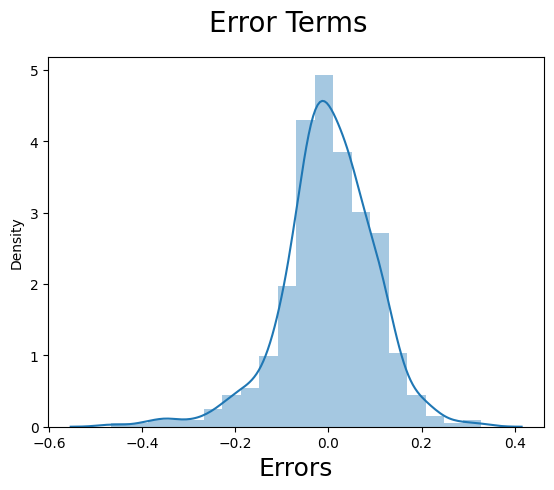

In [528]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_rfe - y_train_rfe_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

## Making Predictions
Applying scaling on the test sets

In [529]:
df_test_rfe

,season,yr,holiday,weekday,workingday,weathersit,atemp,windspeed,cnt
184,3,0,1,1,0,2,33.27085,5.459106,6043
535,2,1,0,3,1,1,36.04875,7.625404,6211
299,4,0,0,4,1,2,22.85230,13.250121,2659
221,3,0,0,3,1,1,34.24915,13.417286,4780
152,2,0,0,4,1,1,32.19710,19.583229,4968
...,...,...,...,...,...,...,...,...,...
702,4,1,0,2,1,1,23.45270,11.666643,6606
127,2,0,0,0,0,1,25.94665,5.000712,4333
640,4,1,0,3,1,2,29.95665,4.458569,7572
72,1,0,0,1,1,1,16.60000,9.174042,2046


In [530]:
# creating a list of numeric var
num_vars = ['season', 'weekday', 'weathersit', 'atemp', 'windspeed', 'cnt']

# Fit on data
df_test_rfe[num_vars] = scaler.transform(df_test_rfe[num_vars])
df_test_rfe.head()

,season,yr,holiday,weekday,workingday,weathersit,atemp,windspeed,cnt
184,0.666667,0,1,0.166667,0,0.5,0.769660,0.084219,0.692706
535,0.333333,1,0,0.500000,1,0.0,0.842587,0.153728,0.712034
299,1.000000,0,0,0.666667,1,0.5,0.496145,0.334206,0.303382
221,0.666667,0,0,0.500000,1,0.0,0.795343,0.339570,0.547400
152,0.333333,0,0,0.666667,1,0.0,0.741471,0.537414,0.569029


#### Dividing into X_test and y_test

In [531]:
y_test_rfe = df_test_rfe.pop('cnt')
X_test_rfe = df_test_rfe

In [532]:
X_train_rfe_rfe.columns

Index(['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'atemp', 'windspeed'],
      dtype='object')

In [535]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe_new = X_test_rfe[X_train_rfe_rfe.columns]

# Adding a constant variable 
X_test_rfe_new = sm.add_constant(X_test_rfe_new)

In [536]:
# Making predictions
y_pred_rfe = lm.predict(X_test_rfe_new)

## model evaluation

Text(0, 0.5, 'y_pred')

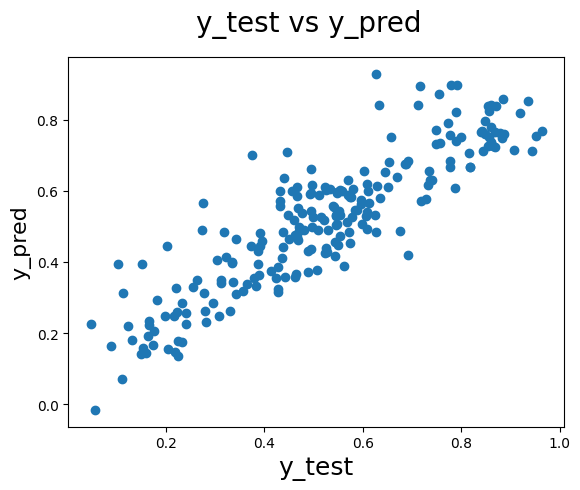

In [537]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_rfe,y_pred_rfe)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [538]:
# evaluate
r2_score(y_true=y_test_rfe, y_pred=y_pred_rfe)

0.7808300849915988